In [3]:
import os
import xarray as xr
import numpy as np
import xgcm # this is an xarray-based package to deal with GCM output
from matplotlib import pyplot as plt
import cmocean # this is a colormap package
import cartopy.crs as ccrs # this is a mapping package
import gsw
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter as gf
%matplotlib inline


In [4]:
ds = xr.open_dataset('LLC4320_pre_data1.nc')

#### Time is 2011-09-13

In [5]:
grid = xgcm.Grid(ds, coords={"X": {"center": "i", "left": "i_g"}, 
 "Y": {"center": "j", "left": "j_g"},
 "Z": {"center": "k"},
 "T": {"center": "time"},})
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (periodic, boundary=None):
  * center   k
T Axis (periodic, boundary=None):
  * center   time

In [6]:
ds = ds.assign_coords(Z=('k',ds.Z))
ds = ds.assign_coords(X=(('j_g','i_g'), ds.XG))
ds = ds.assign_coords(XC=(('j','i'), ds.XC))

In [7]:
#ds['SS'] = (grid.diff(ds.U * ds.DXC, 'X', boundary='extend') -
 #            grid.diff(ds.V * ds.DYC, 'Y', boundary='extend'))/ds.RA
ds['SS'] = (grid.interp(ds.U, 'X', boundary = 'extend') - 
                        grid.interp(ds.V,'Y', boundary = 'extend'))
ds['SU'] = (grid.diff(ds.U * ds.DXC, 'Y', boundary='extend') +
             grid.diff(ds.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ
ds['zeta'] = (-grid.diff(ds.U * ds.DXC, 'Y', boundary='extend') +
                    grid.diff(ds.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ

In [8]:
ds['W'] = (grid.interp(ds.SS**2, ['X','Y'], boundary = 'extend')) + (ds.SU)**2 - (ds.zeta)**2

In [ ]:
ds['f'] = gsw.f(ds.YC.mean(dim = 'i'))
ds['Rossby'] = grid.interp(ds.zeta, ['X','Y'], boundary = 'extend')/ds.f

Text(0.5, 0, 'Longitude [deg]')

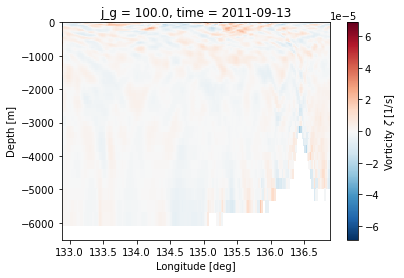

In [31]:
ds.zeta.isel(time=0).isel(j_g=100).plot(y='Z', x='X', cbar_kwargs={'label':r'Vorticity $\zeta$ [1/s]'})
plt.ylabel('Depth [m]')
plt.xlabel('Longitude [deg]')

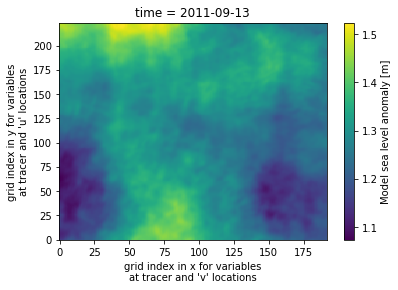

In [8]:
ds.Eta.isel(time=0).plot()

In [9]:
i_slice = slice(31,43) # longitude indices
j_slice = 20
dsw = ds.sel(**(dict(i=i_slice, i_g=i_slice, 
                j_g=j_slice, j=j_slice)))

Text(0.5, 0, 'Longitude [deg]')

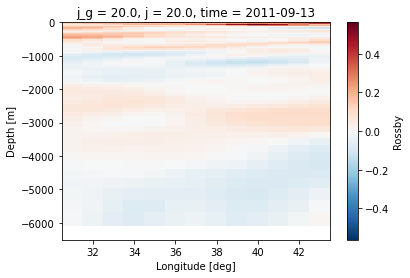

In [168]:
dsw.Rossby.isel(time=0).plot(y='Z')
plt.ylabel('Depth [m]')
plt.xlabel('Longitude [deg]')

Text(0.5, 0, 'Longitude [deg]')

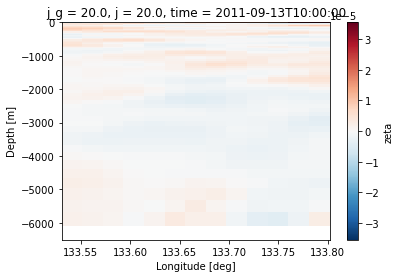

In [87]:
dsw.zeta.isel(time=10).plot(y='Z', x='X')
plt.ylabel('Depth [m]')
plt.xlabel('Longitude [deg]')

(-100.0, 0.0)

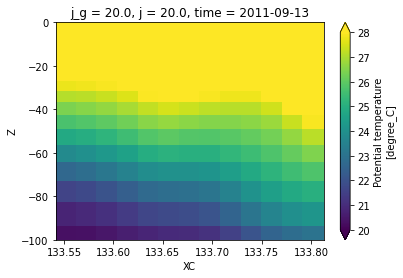

In [176]:
dsw.Theta.isel(time=0).plot(y='Z',x="XC", vmin = 20,vmax = 28)
plt.ylim(-100,0)

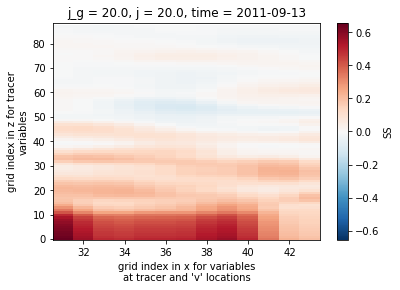

In [50]:
dsw.isel(time=0).SS.plot()

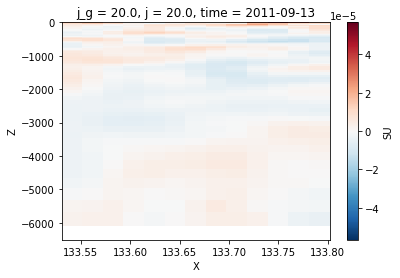

In [89]:
dsw.isel(time=0).SU.plot(y='Z', x='X')

Text(0.5, 0, 'Longitude [deg]')

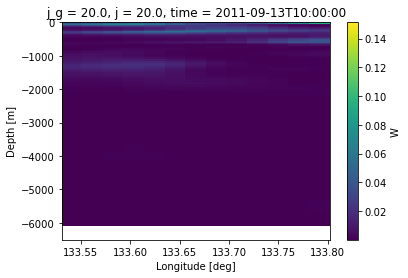

In [88]:
dsw.W.isel(time=10).plot(y='Z', x='X')
plt.ylabel('Depth [m]')
plt.xlabel('Longitude [deg]')

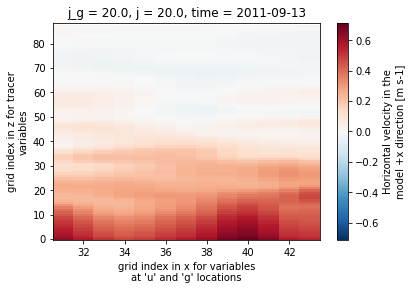

In [16]:
dsw.isel(time=0).U.plot()

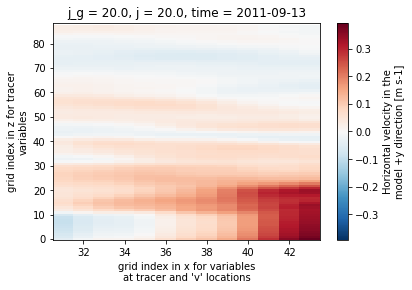

In [17]:
dsw.V.isel(time=0).plot()

#### Density

In [241]:
SA = dsw.Salt(time=0)
CT = dsw.Theta(time=0)
depth = ds.Z
dsw["density"] = gsw.rho(SA, CT, -depth)-1000

TypeError: 'DataArray' object is not callable

In [10]:
dsw["density_anomoly"] = dsw.density - dsw.density.mean()

(-100.0, 0.0)

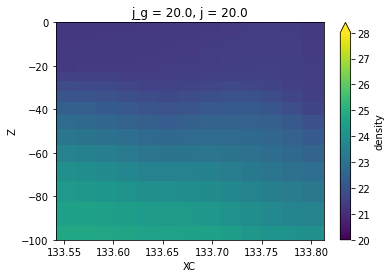

In [187]:
dsw.isel(j=20).density.plot(y='Z',x='XC',vmin=20,vmax=28)
plt.ylim(-100,0)

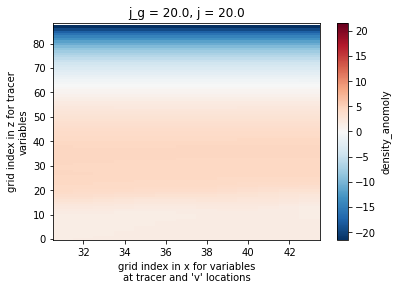

In [41]:
dsw.density_anomoly.plot()

#### Time is 2011-09-18

In [10]:
ds18 = xr.open_dataset('LLC4320_pre_data18.nc')

In [11]:
grid = xgcm.Grid(ds18, coords={"X": {"center": "i", "left": "i_g"}, 
 "Y": {"center": "j", "left": "j_g"},
 "Z": {"center": "k"},
 "T": {"center": "time"},})
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (periodic, boundary=None):
  * center   k
T Axis (periodic, boundary=None):
  * center   time

In [12]:
ds18 = ds18.assign_coords(Z=('k',ds.Z))
ds18 = ds18.assign_coords(X=(('j_g','i_g'), ds.XG))

In [13]:
ds18['SS'] = (grid.interp(ds18.U, 'X', boundary = 'extend') - 
              grid.interp(ds18.V,'Y', boundary = 'extend'))
ds18['SU'] = (grid.diff(ds18.U * ds.DXC, 'Y', boundary='extend') +
              grid.diff(ds18.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ
ds18['zeta'] = (-grid.diff(ds18.U * ds.DXC, 'Y', boundary='extend') +
                grid.diff(ds18.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ

In [14]:
ds18['W'] = (grid.interp(ds18.SS**2, ['X','Y'], boundary = 'extend')) + (ds18.SU)**2 - (ds18.zeta)**2

In [ ]:
ds18['f'] = gsw.f(ds18.YC.mean(dim = 'i'))
ds18['Rossby'] = grid.interp(ds18.zeta, ['X','Y'], boundary = 'extend')/ds18.f

In [15]:
dsw18 = ds18.sel(**(dict(i=i_slice, i_g=i_slice, 
                j_g=j_slice, j=j_slice)))

#### Variables plots

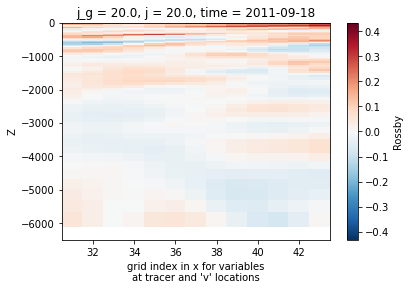

In [100]:
dsw18.Rossby.isel(time=0).plot(y='Z')

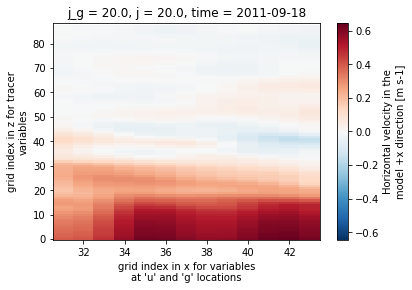

In [29]:
dsw18.U.isel(time = 0).plot()

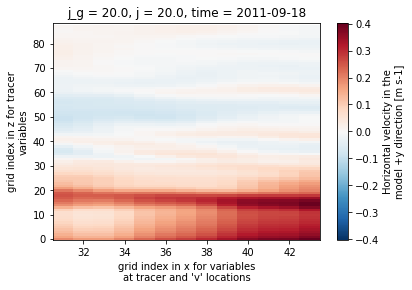

In [30]:
dsw18.V.isel(time=0).plot()

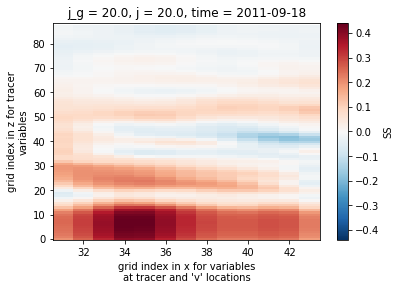

In [52]:
dsw18.isel(time=0).SS.plot()

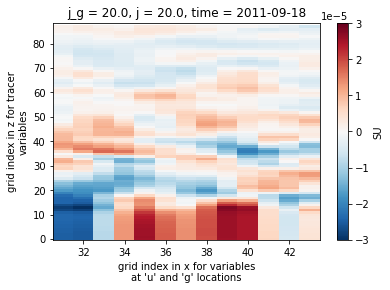

In [53]:
dsw18.isel(time=0).SU.plot()

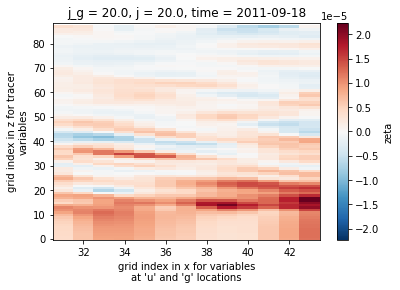

In [54]:
dsw18.isel(time=0).zeta.plot()

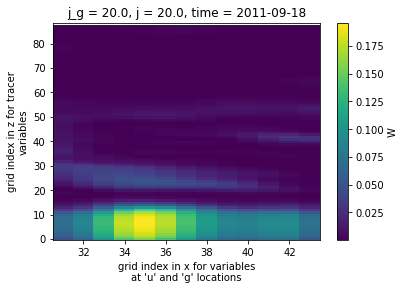

In [82]:
dsw18.isel(time=0).W.plot()

#### Density

In [243]:
SA = dsw18.Salt
CT = dsw18.Theta
depth = dsw18.Z
dsw18["density"] = gsw.rho(SA, CT, -depth)-1000

ValueError: operands could not be broadcast together with shapes (24,89,13) (24,89,13) (89,) 

In [19]:
dsw18["density_anomoly"] = dsw18.density - dsw18.density.mean()

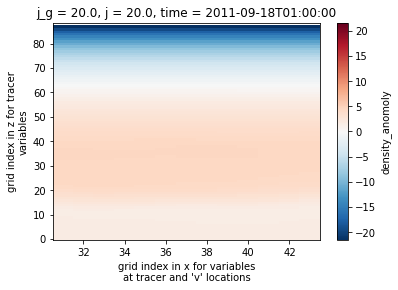

In [142]:
dsw18.density_anomoly.isel(time=1).plot()

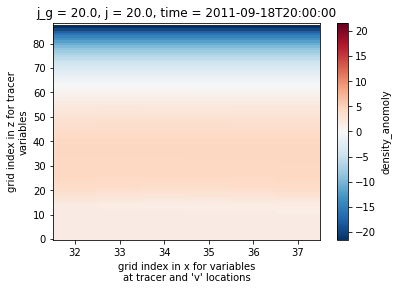

In [115]:
dsw18.density_anomoly.isel(time=20).plot()

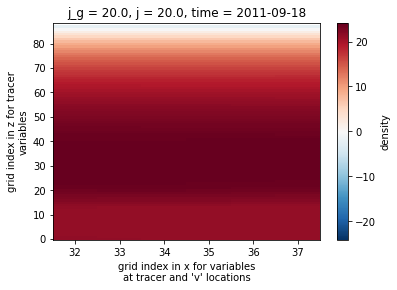

In [101]:
dsw18.isel(time=0).density.plot()

#### Time: 2011-09-28

In [16]:
ds28 = xr.open_dataset('LLC4320_pre-data28.nc')

In [17]:
grid = xgcm.Grid(ds28, coords={"X": {"center": "i", "left": "i_g"}, 
 "Y": {"center": "j", "left": "j_g"},
 "Z": {"center": "k"},
 "T": {"center": "time"},})
ds28 = ds28.assign_coords(Z=('k',ds.Z))
ds28 = ds28.assign_coords(X=(('j_g','i_g'), ds.XG))

In [18]:
ds28['SS'] = (grid.interp(ds28.U, 'X', boundary = 'extend') - 
              grid.interp(ds28.V,'Y', boundary = 'extend'))
ds28['SU'] = (grid.diff(ds28.U * ds.DXC, 'Y', boundary='extend') +
              grid.diff(ds28.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ
ds28['zeta'] = (-grid.diff(ds28.U * ds.DXC, 'Y', boundary='extend') +
                grid.diff(ds28.V * ds.DYC, 'X', boundary='extend'))/ds.RAZ

In [19]:
ds28['W'] = (grid.interp(ds28.SS**2, ['X','Y'], boundary = 'extend')) + (ds28.SU)**2 - (ds28.zeta)**2

In [24]:
ds28['f'] = gsw.f(ds28.YC.mean(dim = 'i'))
ds28['Rossby'] = grid.interp(ds28.zeta, ['X','Y'], boundary = 'extend')/ds28.f

In [20]:
dsw28 = ds28.sel(**(dict(i=i_slice, i_g=i_slice, 
                j_g=j_slice, j=j_slice)))

#### Density

In [26]:
SA = dsw28.Salt
CT = dsw28.Theta
depth = dsw28.Z
dsw28["density"] = gsw.rho(SA, CT, -depth)-1000

In [27]:
dsw28["density_anomoly"] = dsw28.density - dsw28.density.mean()

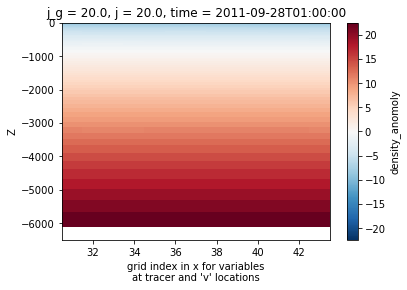

In [156]:
dsw28.density_anomoly.isel(time=1).plot(y='Z')

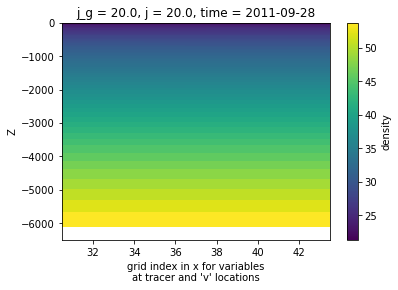

In [157]:
dsw28.density.isel(time=0).plot(y='Z')

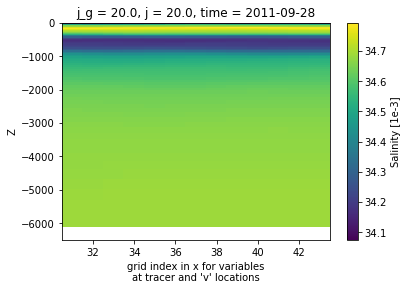

In [161]:
dsw28.Salt.isel(time=0).plot(y='Z')
plt.ylim(-1000,0)

#### Variables plots

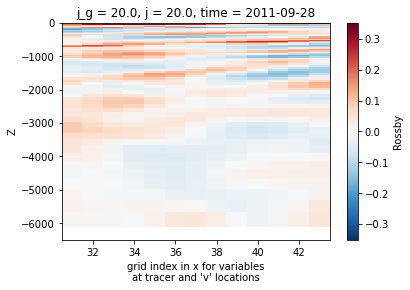

In [103]:
dsw28.isel(time=0).Rossby.plot(y='Z')

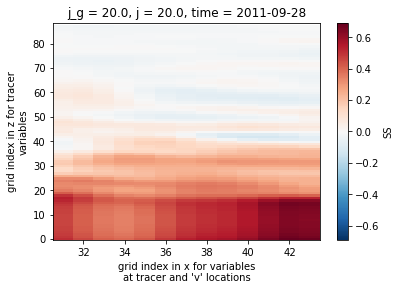

In [78]:
dsw28.isel(time=0).SS.plot()

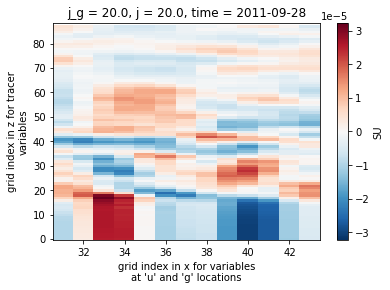

In [79]:
dsw28.isel(time=0).SU.plot()

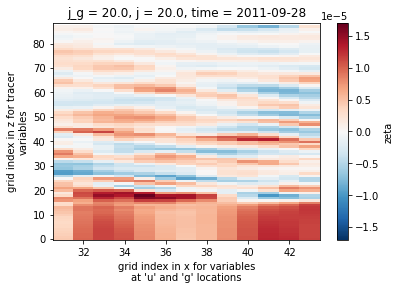

In [80]:
dsw28.isel(time=0).zeta.plot()

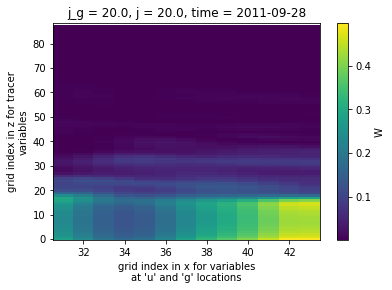

In [81]:
dsw28.isel(time=0).W.plot()

#### Comparison

Text(0.5, 1.0, 'Voticity at 2011-09-28')

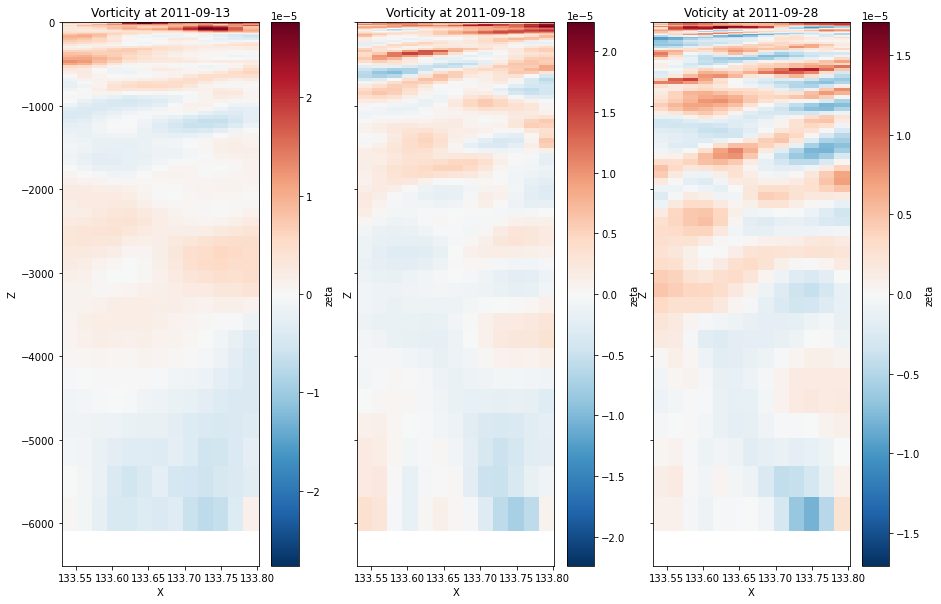

In [111]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.zeta.isel(time=0).plot(y='Z',x='X', ax = ax[0])
dsw18.zeta.isel(time=0).plot(y='Z',x='X', ax = ax[1])
dsw28.zeta.isel(time=0).plot(y='Z',x='X', ax = ax[2])
ax[0].set_title(r'Vorticity at 2011-09-13')
ax[1].set_title(r'Vorticity at 2011-09-18')
ax[2].set_title(r'Voticity at 2011-09-28')

Text(0.5, 1.0, 'SS at 2011-09-28')

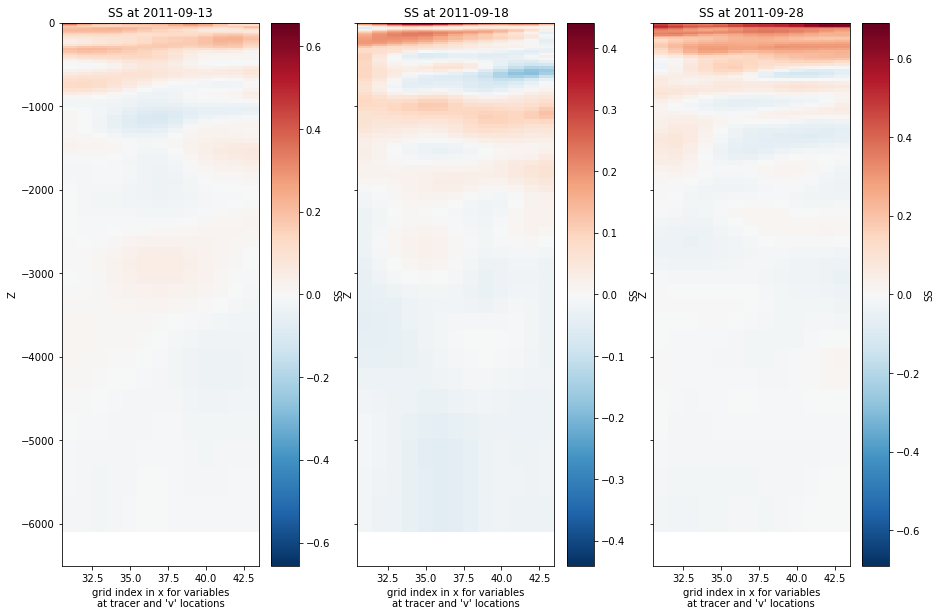

In [116]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.SS.isel(time=0).plot(y='Z', ax = ax[0])
dsw18.SS.isel(time=0).plot(y='Z', ax = ax[1])
dsw28.SS.isel(time=0).plot(y='Z', ax = ax[2])
ax[0].set_title(r'SS at 2011-09-13')
ax[1].set_title(r'SS at 2011-09-18')
ax[2].set_title(r'SS at 2011-09-28')

Text(0.5, 1.0, 'SU at 2011-09-28')

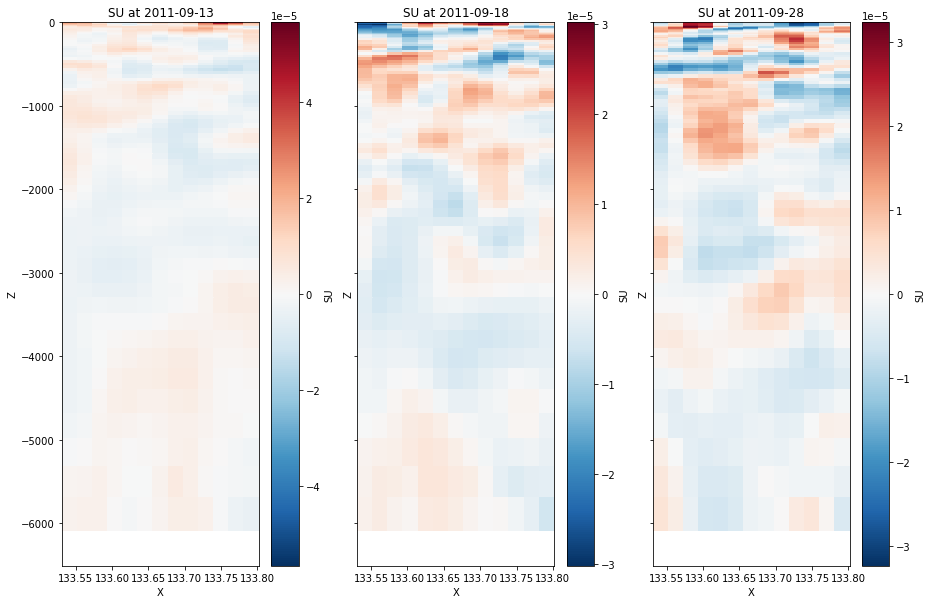

In [117]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.SU.isel(time=0).plot(y='Z',x='X', ax = ax[0])
dsw18.SU.isel(time=0).plot(y='Z',x='X', ax = ax[1])
dsw28.SU.isel(time=0).plot(y='Z',x='X', ax = ax[2])
ax[0].set_title(r'SU at 2011-09-13')
ax[1].set_title(r'SU at 2011-09-18')
ax[2].set_title(r'SU at 2011-09-28')

Text(0.5, 1.0, 'Rossby at 2011-09-28')

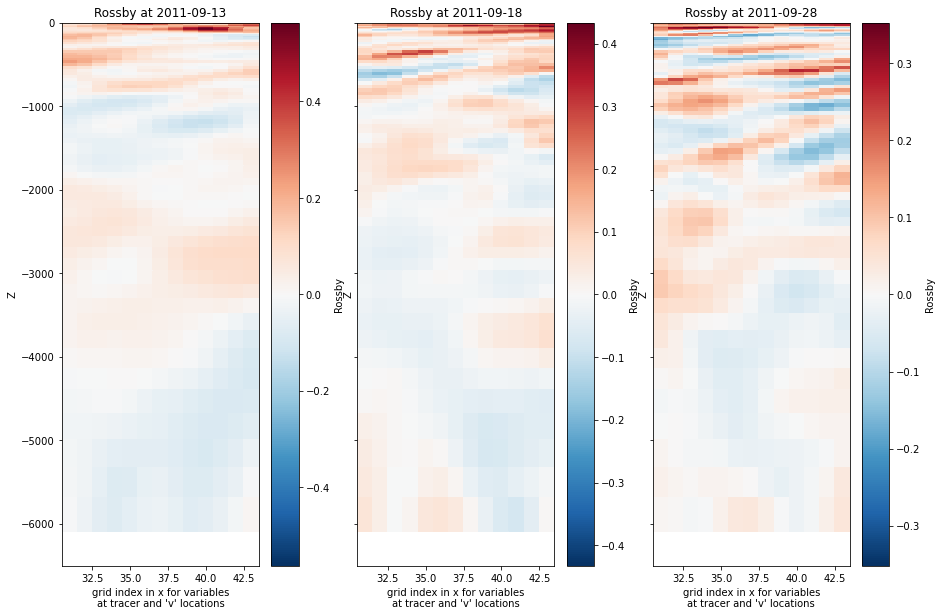

In [121]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.Rossby.isel(time=0).plot(y='Z', ax = ax[0])
dsw18.Rossby.isel(time=0).plot(y='Z', ax = ax[1])
dsw28.Rossby.isel(time=0).plot(y='Z', ax = ax[2])
ax[0].set_title(r'Rossby at 2011-09-13')
ax[1].set_title(r'Rossby at 2011-09-18')
ax[2].set_title(r'Rossby at 2011-09-28')

Text(0.5, 1.0, 'Okubo Weiss at 2011-09-28')

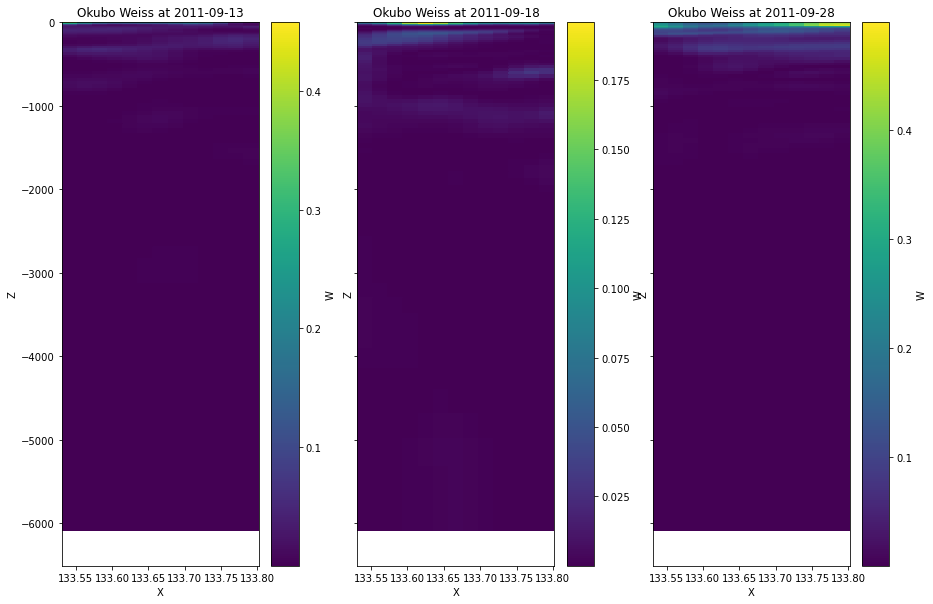

In [122]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.W.isel(time=0).plot(y='Z',x='X', ax = ax[0])
dsw18.W.isel(time=0).plot(y='Z',x='X', ax = ax[1])
dsw28.W.isel(time=0).plot(y='Z',x='X', ax = ax[2])
ax[0].set_title(r'Okubo Weiss at 2011-09-13')
ax[1].set_title(r'Okubo Weiss at 2011-09-18')
ax[2].set_title(r'Okubo Weiss at 2011-09-28')

Text(0.5, 1.0, 'Salinity  at 2011-09-28')

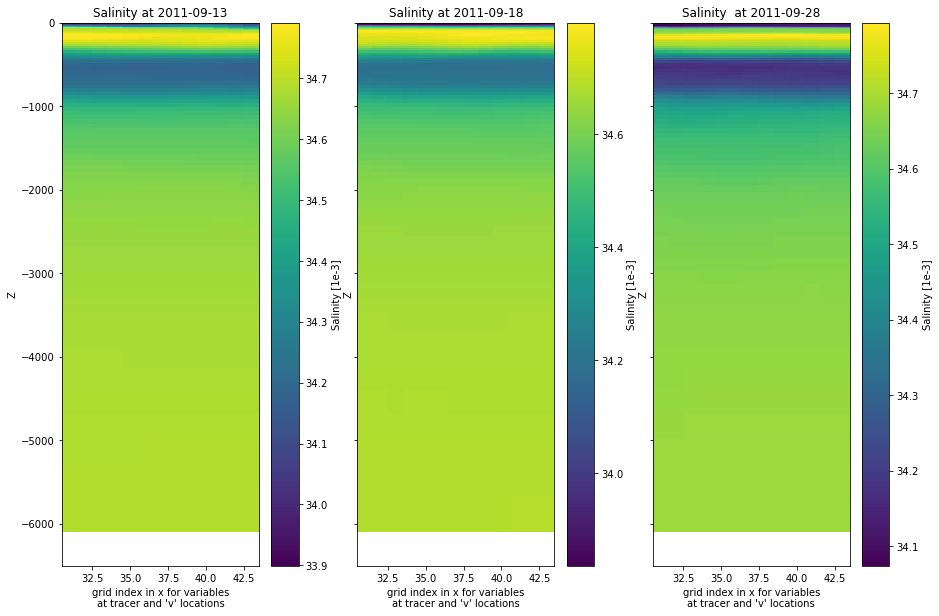

In [165]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.Salt.isel(time=0).plot(y='Z', ax = ax[0])
dsw18.Salt.isel(time=0).plot(y='Z',ax = ax[1])
dsw28.Salt.isel(time=0).plot(y='Z',ax = ax[2])
ax[0].set_title(r'Salinity at 2011-09-13')
ax[1].set_title(r'Salinity at 2011-09-18')
ax[2].set_title(r'Salinity  at 2011-09-28')

Text(0.5, 1.0, 'Temperature at 2011-09-28')

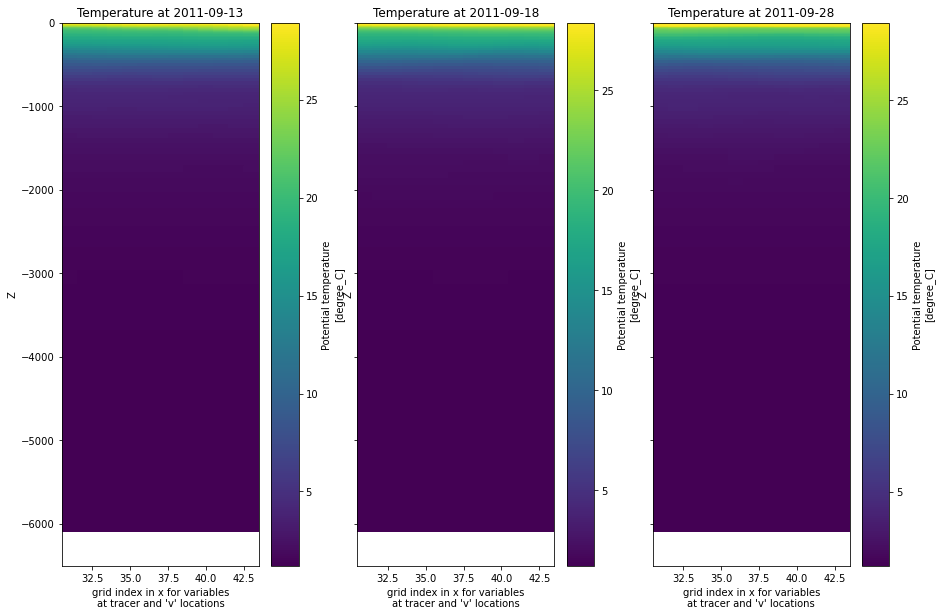

In [130]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.Theta.isel(time=0).plot(y='Z', ax = ax[0])
dsw18.Theta.isel(time=0).plot(y='Z', ax = ax[1])
dsw28.Theta.isel(time=0).plot(y='Z', ax = ax[2])
ax[0].set_title(r'Temperature at 2011-09-13')
ax[1].set_title(r'Temperature at 2011-09-18')
ax[2].set_title(r'Temperature at 2011-09-28')

Text(0.5, 1.0, 'Density at 2011-09-28')

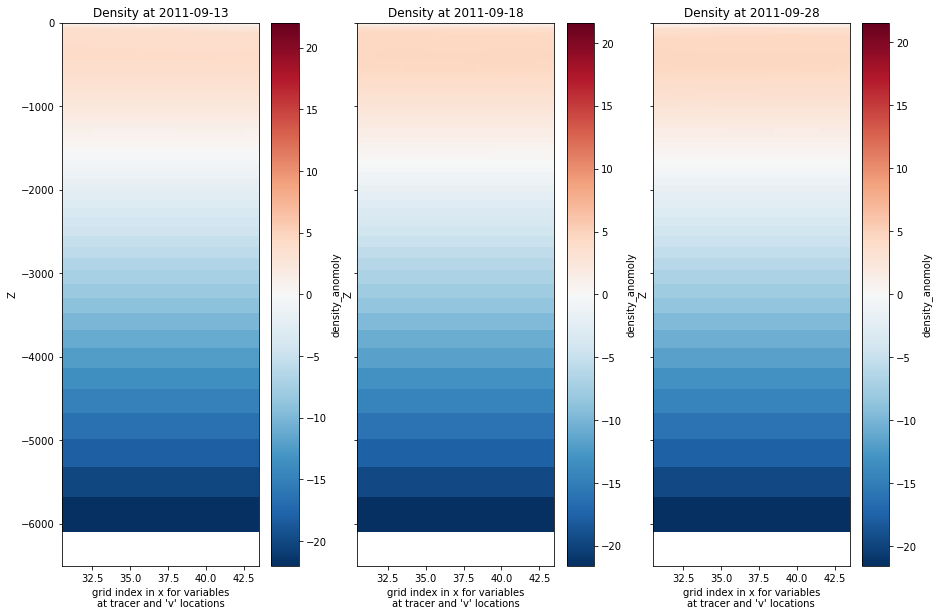

In [151]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
dsw.density_anomoly.plot(y='Z',ax = ax[0])
dsw18.density_anomoly.isel(time=0).plot(y='Z',ax = ax[1])
dsw28.density_anomoly.isel(time=0).plot(y='Z',ax = ax[2])

ax[0].set_title(r'Density at 2011-09-13')
ax[1].set_title(r'Density at 2011-09-18')
ax[2].set_title(r'Density at 2011-09-28')

#### Next step Geo_V

In [111]:
SA = ds.Salt.isel(time=0)
CT = ds.Theta.isel(time=0)
p = -ds.Z
p_ref = 500
#dss['geo_strf_height'] = (('k','j','i'), gsw.geo_strf_dyn_height(dss.Salt, dss.Theta, -dss.Z))
ds['geo_height'] = (('k','j','i'),gsw.geo_strf_dyn_height(SA,CT,p,p_ref))

In [22]:
dsw['geo_height'] = (('k','i'),gsw.geo_strf_dyn_height(dsw.Salt.isel(time=0),dsw.Theta.isel(time=0),-dsw.Z,p_ref))

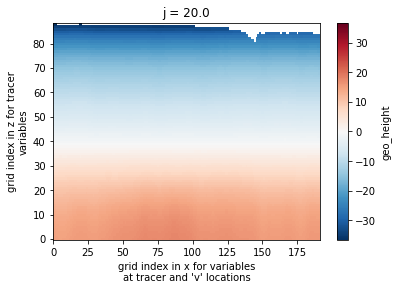

In [23]:
ds.geo_height.isel(j=20).plot()

In [93]:
long = dsw.XC
lat = dsw.YC
[geostrophic_velocity, mid_lat, mid_long] = gsw.geostrophic_velocity(dsw.geo_height,long,lat)

In [46]:
zero = np.zeros(89)

In [62]:
hzero = zero.reshape(89,1)

In [64]:
geo_v1 = np.append(geostrophic_velocity,hzero,axis = 1)

array([[ 0.61894711,  1.08371573,  1.22256585, ...,  0.86830066,
         0.8561644 ,  0.        ],
       [ 0.61965261,  1.08451243,  1.22358877, ...,  0.86673637,
         0.8513456 ,  0.        ],
       [ 0.62045566,  1.08542047,  1.22475288, ...,  0.86490723,
         0.84581331,  0.        ],
       ...,
       [-0.14616181,  0.09559692,  0.18041313, ..., -0.12608262,
        -0.15420716,  0.        ],
       [-0.14582982,  0.0961505 ,  0.1809459 , ..., -0.126157  ,
        -0.15427977,  0.        ],
       [        nan,         nan,         nan, ...,         nan,
                nan,  0.        ]])

In [26]:
geostrophic_velocity1 = np.append(geostrophic_velocity,zero)

In [27]:
geo_v = geostrophic_velocity1.reshape(89,13)

In [35]:
dsw['geostrophic_velocity'] = (('k','i'),geo_v)

In [65]:
dsw['geostrophic_velocity_edit'] = (('k','i'),geo_v1)

(-4000.0, 0.0350000262260437)

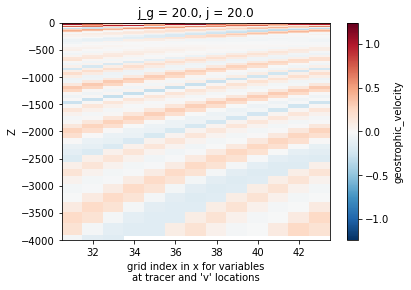

In [29]:
dsw.geostrophic_velocity.plot(y = 'Z')
plt.ylim(-4000)

(-500.0, 0.0350000262260437)

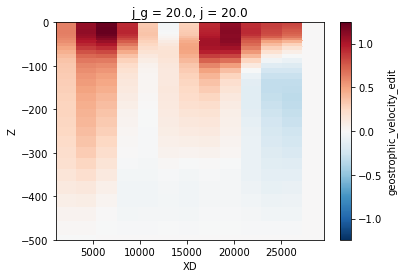

In [67]:
dsw.geostrophic_velocity_edit.plot(y = 'Z', x = 'XD')
plt.ylim(-500)

#### Distance from cell to cell

In [74]:
long = dsw.XC
lat = dsw.YC
ds['distance_one'] = gsw.distance(long,lat)
ds['distance_total'] = np.sum(ds.distance_one)

In [31]:
long18 = dsw18.XC
lat18 = dsw18.YC
long28 = dsw28.XC
lat28 = dsw28.YC
ds18['distance_one'] = gsw.distance(long18,lat18)
ds18['distance_total'] = np.sum(ds18.distance_one)

ds28['distance_one'] = gsw.distance(long28,lat28)
ds28['distance_total'] = np.sum(ds28.distance_one)

(-500.0, 0.0350000262260437)

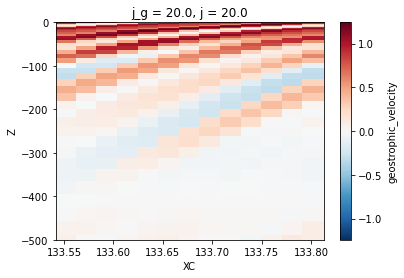

In [36]:
dsw.geostrophic_velocity.plot(y = 'Z',x = 'XC')
plt.ylim(-500)

In [87]:
distance = ds.distance_one.values
distance = np.insert(distance,0,0)
distance

array([   0.        , 2186.53557193, 2184.93488703, 2184.93488703,
       2186.53557193, 2184.93488703, 2184.93488703, 2186.53557192,
       2184.93488703, 2184.93488703, 2186.53557193, 2184.93488703,
       2184.93488703])

In [88]:
for i in range(1,len(distance)):
    distance[i] = distance[i-1] + distance[i]
distance

array([    0.        ,  2186.53557193,  4371.47045896,  6556.40534599,
        8742.94091791, 10927.87580494, 13112.81069197, 15299.3462639 ,
       17484.28115093, 19669.21603796, 21855.75160988, 24040.68649691,
       26225.62138394])

In [89]:
dsw = dsw.assign_coords(XD=(('i'), distance))

(-500.0, 0.0350000262260437)

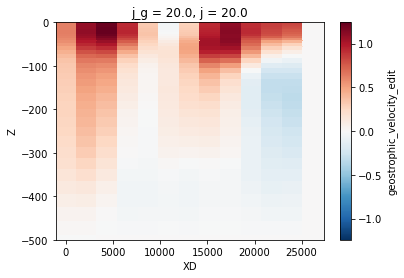

In [90]:
dsw.geostrophic_velocity_edit.plot(y = 'Z',x = 'XD')
plt.ylim(-500)

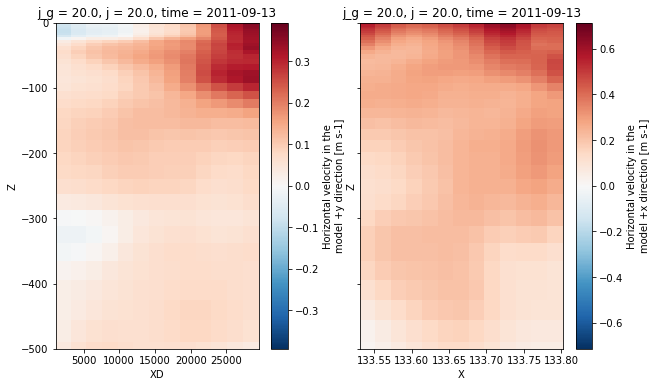

In [41]:
fig, ax = plt.subplots(1,2, figsize = (10,6), sharey = True)
dsw.isel(time=0).V.plot(y = 'Z',x = 'XD',ax = ax[0])
dsw.isel(time=0).U.plot(y = 'Z',x = 'X',ax = ax[1])
plt.ylim(-500)

In [106]:
ds['distance_whole'] = gsw.distance(ds.XC.isel(j = j_slice),ds.YC.isel(j = j_slice))

In [108]:
distance_whole = ds.distance_whole.values
distance_whole = np.insert(distance_whole,0,0)

In [109]:
for i in range(1,len(distance_whole)):
    distance_whole[i] = distance_whole[i-1] + distance_whole[i]

In [116]:
ds = ds.assign_coords(XDH=(('i'), distance_whole))

Runing means

In [228]:
time_window = 2 # in hours
time_selected = 13
lat_selected = 100
ds = ds.rolling(time=time_window).mean() # running mean
ds = ds.isel(time=time_selected)

KeyError: ['time']

In [203]:
[geostrophic_velocity, mid_lat, mid_long] = gsw.geostrophic_velocity(ds.geo_height.isel(j = j_slice),ds.XC.isel(j = j_slice),ds.YC.isel(j = j_slice))

In [204]:
geo_v_whole = np.append(geostrophic_velocity,hzero,axis = 1)

In [205]:
ds['geo_V'] = (('k','i'),geo_v_whole)

(-500.0, 0.0350000262260437)

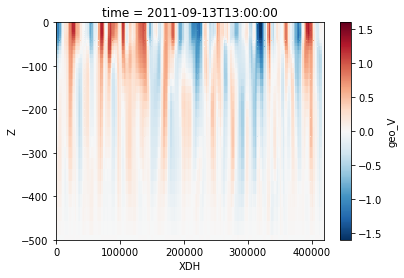

In [206]:
ds.geo_V.plot(y = 'Z',x = 'XDH')
plt.ylim(-500)

In [207]:
[Geo_U, mid_lat1, mid_long1] = gsw.geostrophic_velocity(ds.geo_height.isel(i = 100),
                                                     ds.XC.isel(i =100),ds.YC.isel(i = 100))

In [208]:
geo_U_whole = np.append(Geo_U,hzero,axis = 1)

In [209]:
ds['geo_U'] = (('k','j'), geo_U_whole)

(-500.0, 0.0350000262260437)

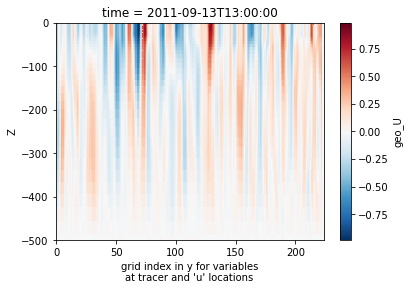

In [210]:
ds.geo_U.plot(y = 'Z')
plt.ylim(-500)

In [211]:
ds = ds.assign_coords(YC=(('j','i'), ds.YC))

Text(0.5, 1.0, 'Geostrophic_U')

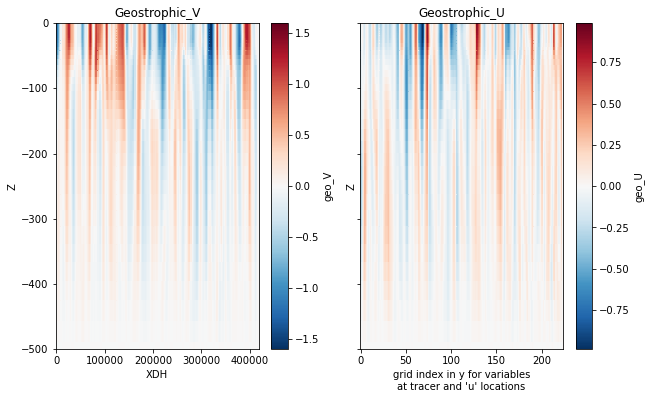

In [212]:
fig, ax = plt.subplots(1,2, figsize = (10,6), sharey = True)
ds.geo_V.plot(y = 'Z',x = 'XDH',ax = ax[0])
ds.geo_U.plot(y = 'Z',ax = ax[1])
ax[0].set_ylim(-500,0)
ax[1].set_ylim(-500,0)
ax[0].set_title('Geostrophic_V')
ax[1].set_title('Geostrophic_U')

In [213]:
ds['gf_Geo_V'] = (('k', 'i'), gf(ds.geo_V, sigma = 10, mode='nearest',cval=0))

In [214]:
ds['gf_Geo_U'] = (('k', 'j'), gf(ds.geo_U, sigma = 10, mode='nearest',cval=0))

Text(0.5, 1.0, 'Geostrophic_U')

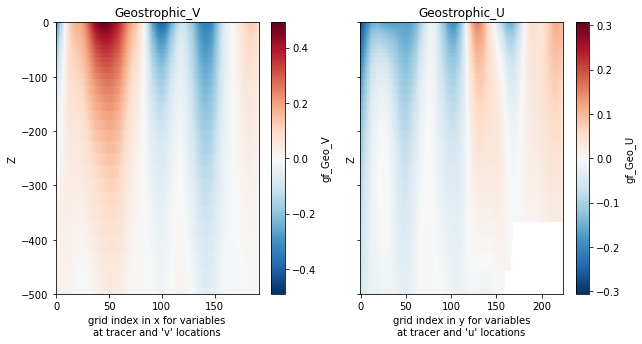

In [215]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True)
ds.gf_Geo_V.plot(y = 'Z',ax = ax[0])
ds.gf_Geo_U.plot(y = 'Z',ax = ax[1])
ax[0].set_ylim(-500,0)
ax[1].set_ylim(-500,0)
ax[0].set_title('Geostrophic_V')
ax[1].set_title('Geostrophic_U')

In [216]:
gap = mid_lat[1]-mid_lat[0]
gap1 = mid_long1[1] - mid_long1[0]

In [217]:
mid_long1.size

223

In [218]:
add = mid_lat[190] + gap
add1 = mid_long1[222] + gap1

In [219]:
mid_lat = np.append(mid_lat,add)

In [220]:
mid_long1 = np.append(mid_long1,add1)

Text(0.5, 1.0, 'Geostrophic_U')

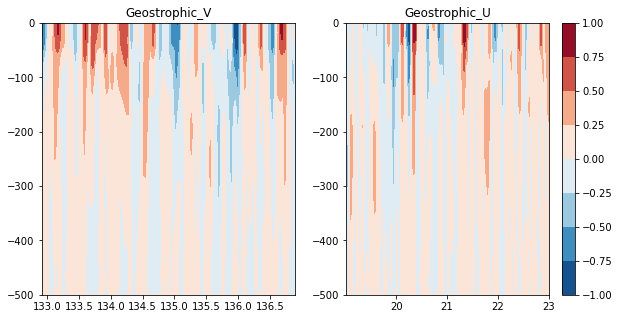

In [221]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].contourf(mid_lat,ds.Z,ds.geo_V, cmap='RdBu_r')
h = ax[1].contourf(mid_long1,ds.Z,ds.geo_U, cmap='RdBu_r')
plt.colorbar(h)
ax[0].set_ylim(-500,0)
ax[1].set_ylim(-500,0)
ax[0].set_title('Geostrophic_V')
ax[1].set_title('Geostrophic_U')

Text(0.5, 1.0, 'Geostrophic_U')

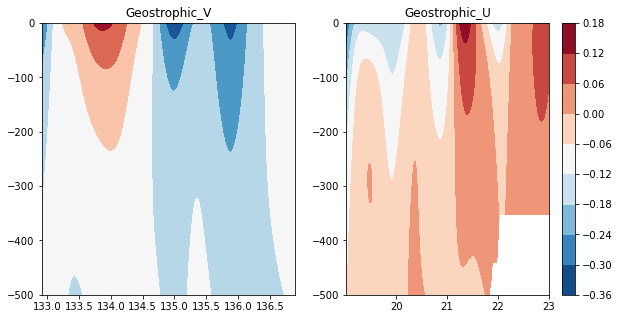

In [222]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].contourf(mid_lat,ds.Z,ds.gf_Geo_V, cmap='RdBu_r')
h = ax[1].contourf(mid_long1,ds.Z,ds.gf_Geo_U, cmap='RdBu_r')
plt.colorbar(h)
ax[0].set_ylim(-500,0)
ax[1].set_ylim(-500,0)
ax[0].set_title('Geostrophic_V')
ax[1].set_title('Geostrophic_U')

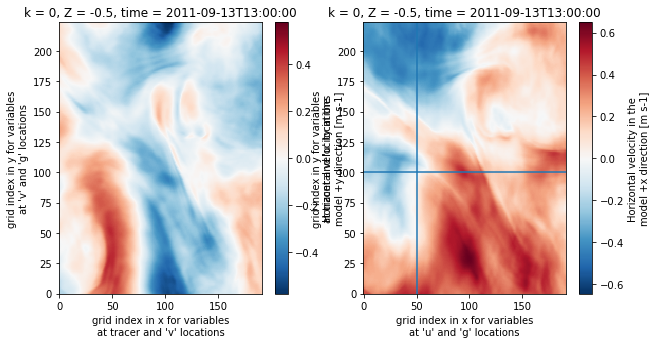

In [224]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ds.isel(k = 0).V.plot(ax = ax[0])
ds.isel(k = 0).U.plot(ax = ax[1])
plt.axhline(100)
plt.axvline(50)

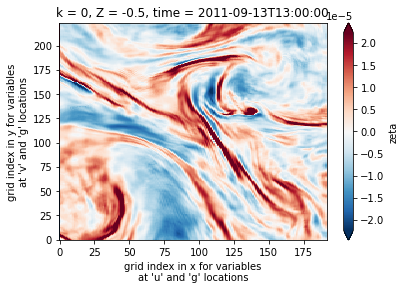

In [227]:
ds.isel(k=0).zeta.plot(robust = True)

In [232]:
ds['f'] = gsw.f(ds.YC.mean(dim = 'i')) #Coriolis force


In [233]:
ds.f

<xarray.DataArray 'f' (f: 224)>
array([4.749520e-05, 4.753879e-05, 4.758237e-05, ..., 5.688411e-05,
       5.692545e-05, 5.696675e-05])
Coordinates:
    time     datetime64[ns] 2011-09-13T13:00:00
  * f        (f) float64 4.75e-05 4.754e-05 4.758e-05 ... 5.693e-05 5.697e-05